In [1]:
import os
import matplotlib.pyplot as plt

# Set Constants and create result directory

In [2]:
# Experiment directories
EXPERIMENT_DATA = {
    'name': 'CIFAR10_Classification',
    'number': 17,
    'description': ['Basic CNN for CIFAR 10', 'Data augmentation with VGG based model']
}

ROOT_DIR = os.getcwd()

# Your directory to save results of experiments
RESULT_DIR = os.path.join(ROOT_DIR, 'drive', 'MyDrive', '1_University', '2021-2', 'Inteligence_Software', 'Project')

os.chdir(RESULT_DIR)
curr_result_dir_name = f"{EXPERIMENT_DATA['name']}_{EXPERIMENT_DATA['number']}"
if (curr_result_dir_name not in os.listdir()):
    os.mkdir(curr_result_dir_name)
CURR_RESULT_DIR = os.path.join(RESULT_DIR, curr_result_dir_name)

# Model Parameters
NUM_CLASS = 10
BATCH_SIZE = 512
EPOCHS = 300

os.chdir(CURR_RESULT_DIR)
with open('README.md', 'wt') as f:
    f.write('# Description of current experiment\n')
    f.write(f'- {curr_result_dir_name}\n')
    for desc in EXPERIMENT_DATA['description']:
        f.write(f"- {desc}\n")
    f.write('\n')

    f.write('# Experiment environment\n')
    f.write('- Colab Environment\n')
    f.write(f'- Epochs: {EPOCHS}\n')
    f.write(f'- Batch Size: {BATCH_SIZE}\n\n')

# Load Data

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255., x_test.astype('float32') / 255.
y_train, y_test = keras.utils.to_categorical(y_train, NUM_CLASS), keras.utils.to_categorical(y_test, NUM_CLASS)

In [5]:
print(f'x_train shape: {x_train.shape}', f'x_test shape: {x_test.shape}', sep = '\n', end = '\n\n')
print(f'y_train shape: {y_train.shape}', f'y_test shape: {y_test.shape}', sep = '\n')

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)

y_train shape: (50000, 10)
y_test shape: (10000, 10)


In [6]:
datagen = keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
iter_train = datagen.flow(x_train, y_train, batch_size = BATCH_SIZE)

In [7]:
_, HEIGHT, WIDTH, CHANNEL = x_train.shape

# Construct Model

In [8]:
# Use keras functional API
input = layers.Input((HEIGHT, WIDTH, CHANNEL), name = 'Input layer')

x = layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', kernel_initializer = 'he_uniform')(input)
x = layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', kernel_initializer = 'he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((3, 3), (2, 2), padding = 'same')(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu', kernel_initializer = 'he_uniform')(x)
x = layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu', kernel_initializer = 'he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((3, 3), (2, 2), padding = 'same')(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu', kernel_initializer = 'he_uniform')(x)
x = layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu', kernel_initializer = 'he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((3, 3), (2, 2), padding = 'same')(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu', kernel_initializer = 'he_uniform')(x)
x = layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu', kernel_initializer = 'he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((3, 3), (2, 2), padding = 'same')(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu', kernel_initializer = 'he_uniform')(x)
x = layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu', kernel_initializer = 'he_uniform')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((3, 3), (2, 2), padding = 'same')(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)

output = layers.Dense(NUM_CLASS, activation = 'softmax')(x)

In [9]:
model = keras.Model(input, output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0     

In [10]:
keras.utils.plot_model(model, show_shapes = True)
with open('README.md', 'a') as f:
    f.write('# Model information\n')
    f.write('- [Model Plots](model.png)\n\n')

In [11]:
model.compile(optimizer = keras.optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
steps = int(x_train.shape[0] / BATCH_SIZE)
history = model.fit(iter_train, steps_per_epoch = steps, epochs = EPOCHS, validation_data = (x_test, y_test))

Epoch 1/300
97/97 [==============================] - 48s 357ms/step - loss: 2.4059 - acc: 0.1921 - val_loss: 2.3975 - val_acc: 0.1253
Epoch 2/300
97/97 [==============================] - 34s 349ms/step - loss: 1.8421 - acc: 0.3092 - val_loss: 2.7499 - val_acc: 0.1667
Epoch 3/300
97/97 [==============================] - 34s 349ms/step - loss: 1.6463 - acc: 0.3810 - val_loss: 2.8415 - val_acc: 0.1999
Epoch 4/300
97/97 [==============================] - 34s 349ms/step - loss: 1.5023 - acc: 0.4425 - val_loss: 2.3759 - val_acc: 0.2804
Epoch 5/300
97/97 [==============================] - 34s 350ms/step - loss: 1.4006 - acc: 0.4857 - val_loss: 1.7195 - val_acc: 0.4546
Epoch 6/300
97/97 [==============================] - 34s 351ms/step - loss: 1.3098 - acc: 0.5256 - val_loss: 1.5640 - val_acc: 0.4942
Epoch 7/300
97/97 [==============================] - 34s 348ms/step - loss: 1.2420 - acc: 0.5541 - val_loss: 1.4898 - val_acc: 0.5045
Epoch 8/300
97/97 [==============================] - 34s 349ms

# Plot Results

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss, test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.3480 - acc: 0.8902
0.3480488657951355 0.8902000188827515


In [ ]:
with open('README.md', 'a') as f:
    f.write('# Results\n')

    f.write('## Loss\n')
    f.write(f'- Train Loss: {history.history["loss"][-1]:.4f}\n')
    f.write(f'- Test Loss: {test_loss:.4f}\n\n')

    f.write('### Loss graph\n')
    f.write('![](Loss_Result.png)\n\n')

    f.write('## Accuracy\n')
    f.write(f'- Train Accuracy: {history.history["acc"][-1] * 100:.2f}%\n')
    f.write(f'- Test Accuracy: {test_acc * 100:.2f}%\n\n')

    f.write('### Accuracy graph\n')
    f.write('![](Accuracy_Result.png)\n\n')

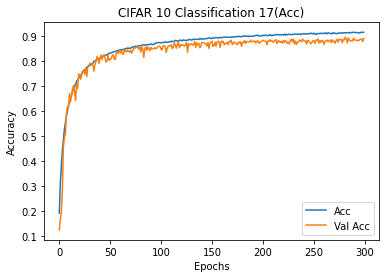

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc', 'Val Acc'])
plt.title(f'CIFAR 10 Classification {EXPERIMENT_DATA["number"]}(Acc)')

plt.savefig('Accuracy_Result.png')
plt.show()

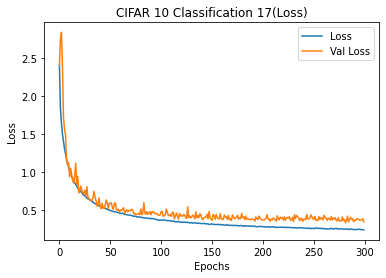

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Val Loss'])
plt.title(f'CIFAR 10 Classification {EXPERIMENT_DATA["number"]}(Loss)')

plt.savefig('Loss_Result.png')
plt.show()